## Electricity Consumption Exploration

---

![](https://images.unsplash.com/photo-1487875961445-47a00398c267?ixlib=rb-1.2.1&ixid=eyJhcHBfaWQiOjEyMDd9&auto=format&fit=crop&w=1650&q=80)
Photo by [Jason Blackeye](https://unsplash.com/photos/nyL-rzwP-Mk)

In this exercise, you will be asked to explore time series data in several ways.

You will be working with time series of Open Power System Data ([OPSD](https://open-power-system-data.org/)) for Germany. 

The data set includes daily electricity consumption, wind power production, and solar power production between 2006 and 2017. 
```
- Date — The date (yyyy-mm-dd format)
- Consumption — Electricity consumption in GWh
- Wind — Wind power production in GWh
- Solar — Solar power production in GWh
- Wind+Solar — Sum of wind and solar power production in GWh
```

# Data Exploration

In [1]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
%matplotlib inline

In [3]:
data = pd.read_csv('opsd_germany_daily.csv')

In [4]:
data.head()

,Date,Consumption,Wind,Solar,Wind+Solar
0,2006-01-01,1069.184,NaN,NaN,NaN
1,2006-01-02,1380.521,NaN,NaN,NaN
2,2006-01-03,1442.533,NaN,NaN,NaN
3,2006-01-04,1457.217,NaN,NaN,NaN
4,2006-01-05,1477.131,NaN,NaN,NaN


In [6]:
# description of the data

data.describe()

,Consumption,Wind,Solar,Wind+Solar
count,4383.000000,2920.000000,2188.000000,2187.000000
mean,1338.675836,164.814173,89.258695,272.663481
std,165.775710,143.692732,58.550099,146.319884
min,842.395000,5.757000,1.968000,21.478000
25%,1217.859000,62.353250,35.179250,172.185500
50%,1367.123000,119.098000,86.407000,240.991000
75%,1457.761000,217.900250,135.071500,338.988000
max,1709.568000,826.278000,241.580000,851.556000


In [15]:
# Transforming the dates into datetime format

data['Date']=pd.DatetimeIndex(data['Date'])

In [16]:
data.dtypes

Date           datetime64[ns]
Consumption           float64
Wind                  float64
Solar                 float64
Wind+Solar            float64
dtype: object

Then, make sure to transform the dates into datetime format in pandas :

### 1. Plotting and understanding a time series

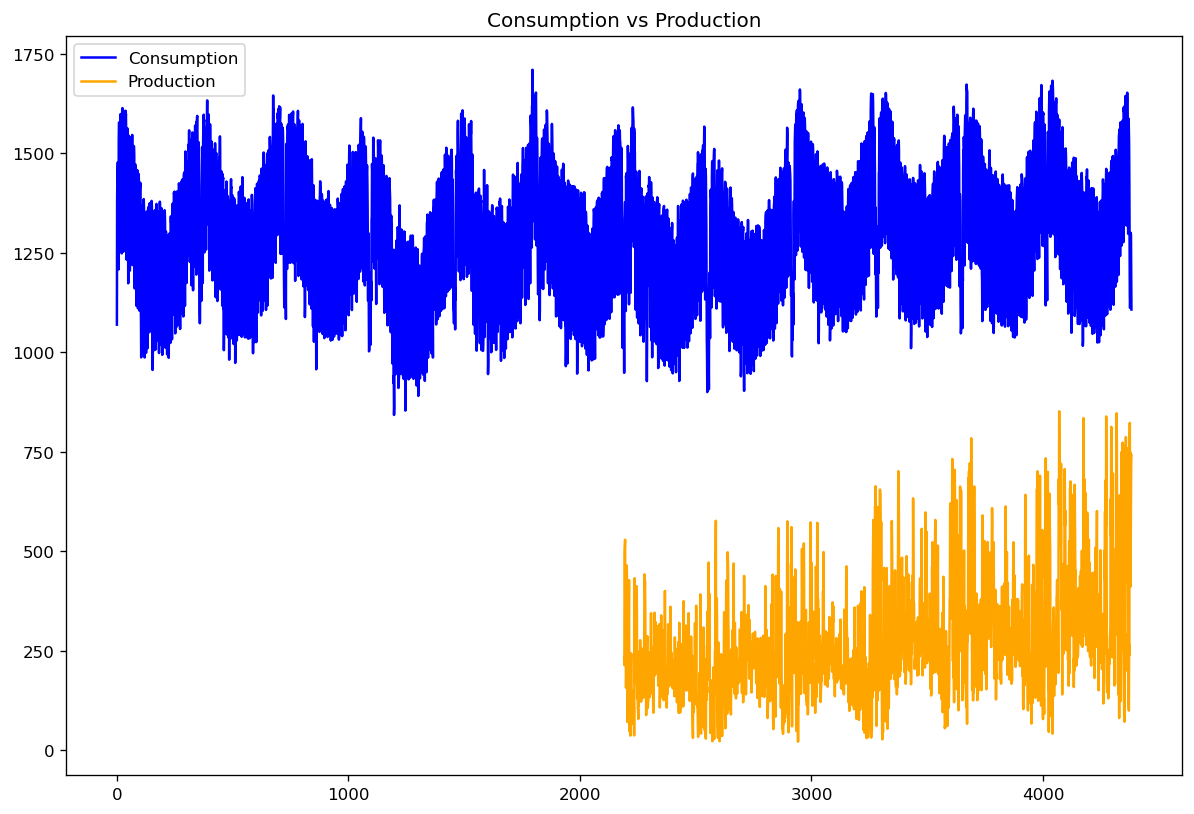

In [23]:
plt.figure(figsize=(12,8), dpi=120)

plt.plot(data['Consumption'], color='blue', label='Consumption')
plt.plot(data['Wind+Solar'], color='orange', label='Production')
plt.legend()
plt.title('Consumption vs Production')
plt.show()

Q1 - Plot the different time series. What do you understand, what do you notice ?

From the above chart we can infer that Consumption of the electricity throughout is consistent and higher as compared to the production of electricity.

We can also avoid plotting lines and simply plot dots for the consumption :

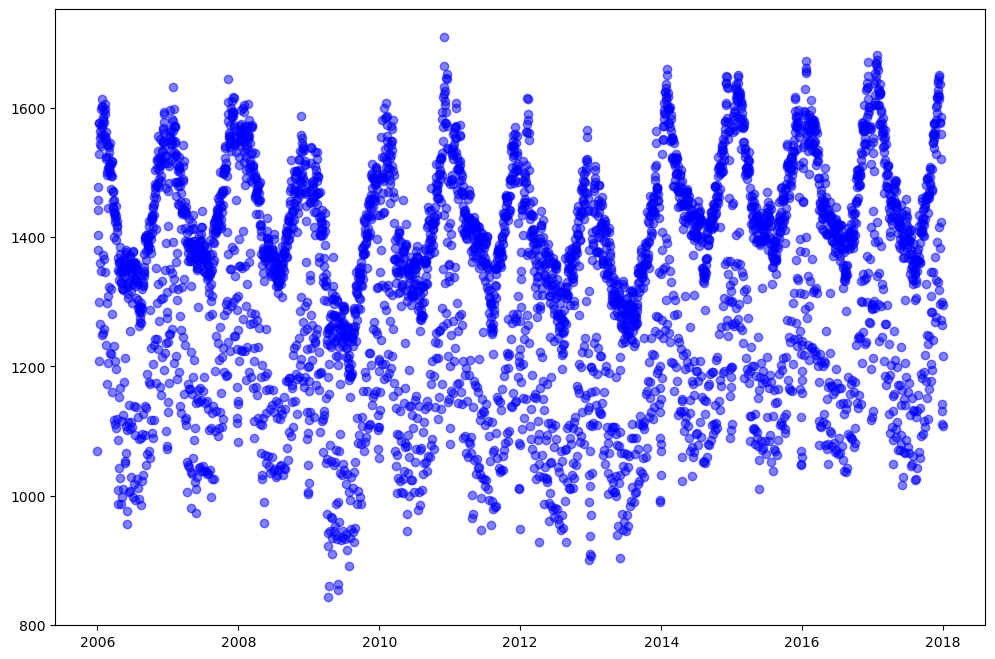

In [26]:
plt.figure(figsize=(12,8))
plt.scatter(data['Date'],data['Consumption'], color='blue', alpha=0.5)
plt.show()

And plot the production over time :

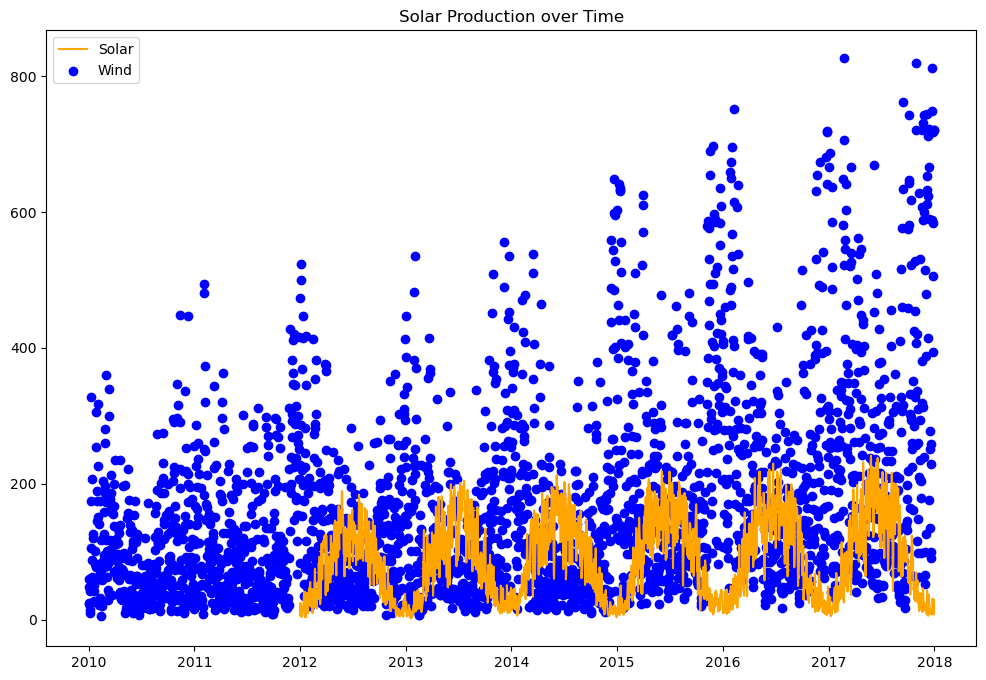

In [29]:
plt.figure(figsize=(12,8))
plt.plot(data['Date'], data['Solar'], color='orange', label = 'Solar')
plt.scatter(data['Date'], data['Wind'], color='blue', label = 'Wind')
plt.legend()
plt.title('Solar Production over Time')
plt.show()

Things to identify:

1. The consumtion of electricity is higher than the production
2. There is no Solar Production of electricity before the year 2012
3. The production of electricity through Wind keeps on increasing throughout the years
4. The production of Solar electricity peaks in the middle of year and then falls down. It seems to be Seasonal where it peaks in some parts of the year and then falls down.

How do consumption and production compare ?
+ We notice that wind bsaed production increases over time, and is rather high in winter (for example more storms).
+ On the other hand, the solar production is higher in summer (seems logic)
+ The consumption is higher in winter

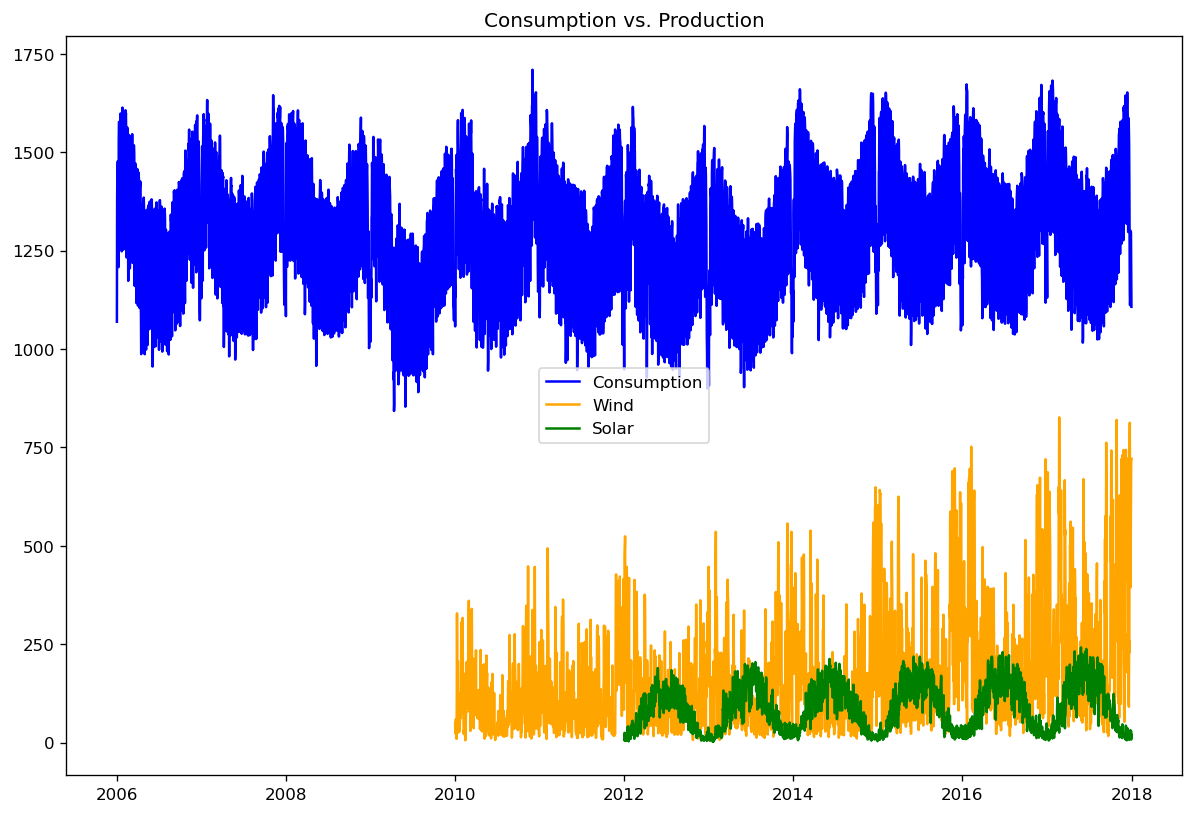

In [31]:
plt.figure(figsize=(12,8), dpi=120)
plt.plot(data['Date'], data['Consumption'], color='blue', label='Consumption')
plt.plot(data['Date'], data['Wind'], color='orange', label='Wind')
plt.plot(data['Date'], data['Solar'], color='green', label='Solar')
plt.title('Consumption vs. Production')
plt.legend(loc='center')
plt.show()

### 2. Change the scale

Q2 - Try to change the scale to understand the recurrent patterns !

In [32]:
data.head()

,Date,Consumption,Wind,Solar,Wind+Solar
0,2006-01-01,1069.184,NaN,NaN,NaN
1,2006-01-02,1380.521,NaN,NaN,NaN
2,2006-01-03,1442.533,NaN,NaN,NaN
3,2006-01-04,1457.217,NaN,NaN,NaN
4,2006-01-05,1477.131,NaN,NaN,NaN


In [36]:
df = data.copy()

In [38]:
df['year'] = df['Date'].dt.year

In [47]:
year_df= df[df['year'] == 2017]

In [49]:
year_df['Date']

4018   2017-01-01
4019   2017-01-02
4020   2017-01-03
4021   2017-01-04
4022   2017-01-05
          ...    
4378   2017-12-27
4379   2017-12-28
4380   2017-12-29
4381   2017-12-30
4382   2017-12-31
Name: Date, Length: 365, dtype: datetime64[ns]

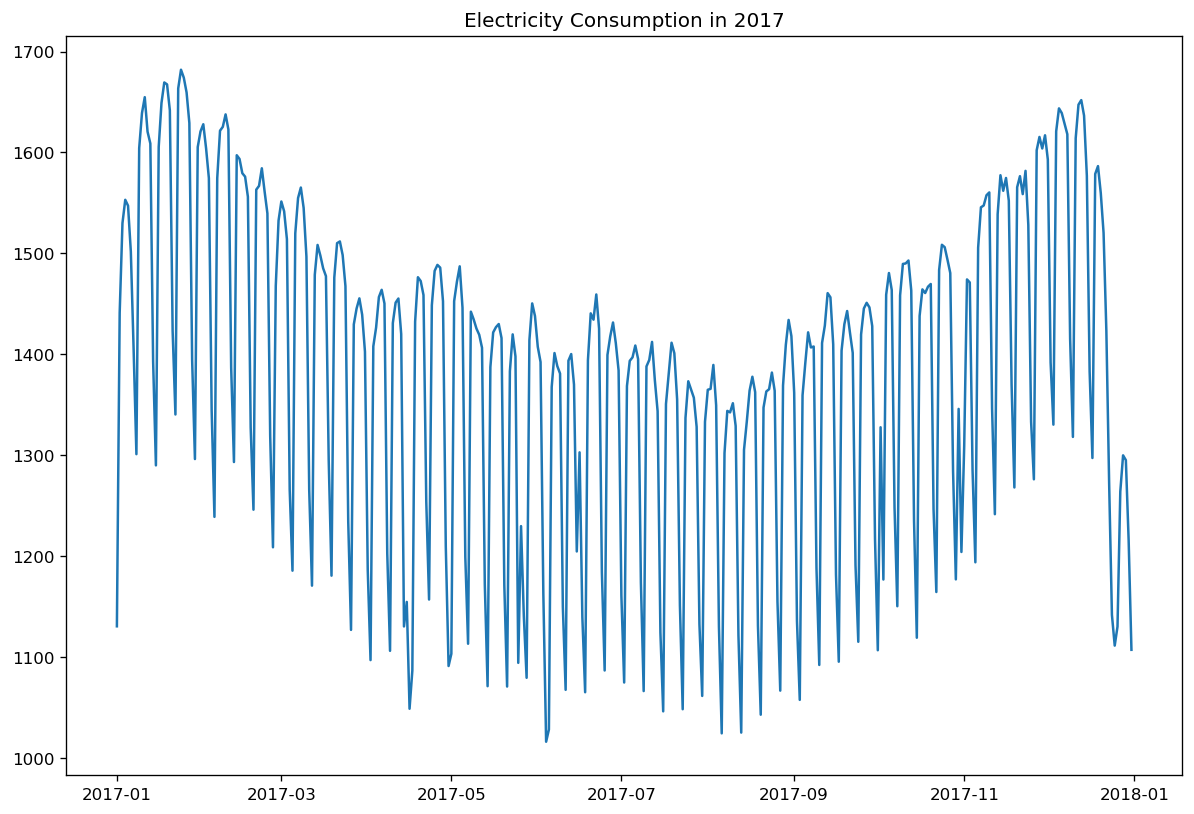

In [51]:
plt.figure(figsize=(12,8), dpi=120)
plt.plot(year_df['Date'], year_df['Consumption'])
plt.title('Electricity Consumption in 2017')
plt.show()

It confirms the trend : more consumption in winter time, and less in summer. We can then zoom on a given month :

In [53]:
year_df

,Date,Consumption,Wind,Solar,Wind+Solar,year
4018,2017-01-01,1130.41300,307.125,35.291,342.416,2017
4019,2017-01-02,1441.05200,295.099,12.479,307.578,2017
4020,2017-01-03,1529.99000,666.173,9.351,675.524,2017
4021,2017-01-04,1553.08300,686.578,12.814,699.392,2017
4022,2017-01-05,1547.23800,261.758,20.797,282.555,2017
...,...,...,...,...,...,...
4378,2017-12-27,1263.94091,394.507,16.530,411.037,2017
4379,2017-12-28,1299.86398,506.424,14.162,520.586,2017
4380,2017-12-29,1295.08753,584.277,29.854,614.131,2017
4381,2017-12-30,1215.44897,721.247,7.467,728.714,2017


extracting the month of July

In [56]:
year_df['month'] = year_df['Date'].dt.month

C:\Users\dudes\AppData\Local\Temp\ipykernel_6428\3878738906.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  year_df['month'] = year_df['Date'].dt.month


In [57]:
year_df

,Date,Consumption,Wind,Solar,Wind+Solar,year,month
4018,2017-01-01,1130.41300,307.125,35.291,342.416,2017,1
4019,2017-01-02,1441.05200,295.099,12.479,307.578,2017,1
4020,2017-01-03,1529.99000,666.173,9.351,675.524,2017,1
4021,2017-01-04,1553.08300,686.578,12.814,699.392,2017,1
4022,2017-01-05,1547.23800,261.758,20.797,282.555,2017,1
...,...,...,...,...,...,...,...
4378,2017-12-27,1263.94091,394.507,16.530,411.037,2017,12
4379,2017-12-28,1299.86398,506.424,14.162,520.586,2017,12
4380,2017-12-29,1295.08753,584.277,29.854,614.131,2017,12
4381,2017-12-30,1215.44897,721.247,7.467,728.714,2017,12


In [60]:
month = year_df[year_df['month']==7]

month

,Date,Consumption,Wind,Solar,Wind+Solar,year,month
4199,2017-07-01,1160.762,326.425,109.991,436.416,2017,7
4200,2017-07-02,1074.715,312.884,106.362,419.246,2017,7
4201,2017-07-03,1368.537,274.607,196.602,471.209,2017,7
4202,2017-07-04,1393.457,172.131,193.728,365.859,2017,7
4203,2017-07-05,1396.984,33.863,201.440,235.303,2017,7
4204,2017-07-06,1408.679,51.188,217.346,268.534,2017,7
4205,2017-07-07,1395.258,123.191,173.788,296.979,2017,7
4206,2017-07-08,1173.655,132.115,181.671,313.786,2017,7
4207,2017-07-09,1066.220,49.084,180.651,229.735,2017,7
4208,2017-07-10,1387.963,85.882,127.007,212.889,2017,7


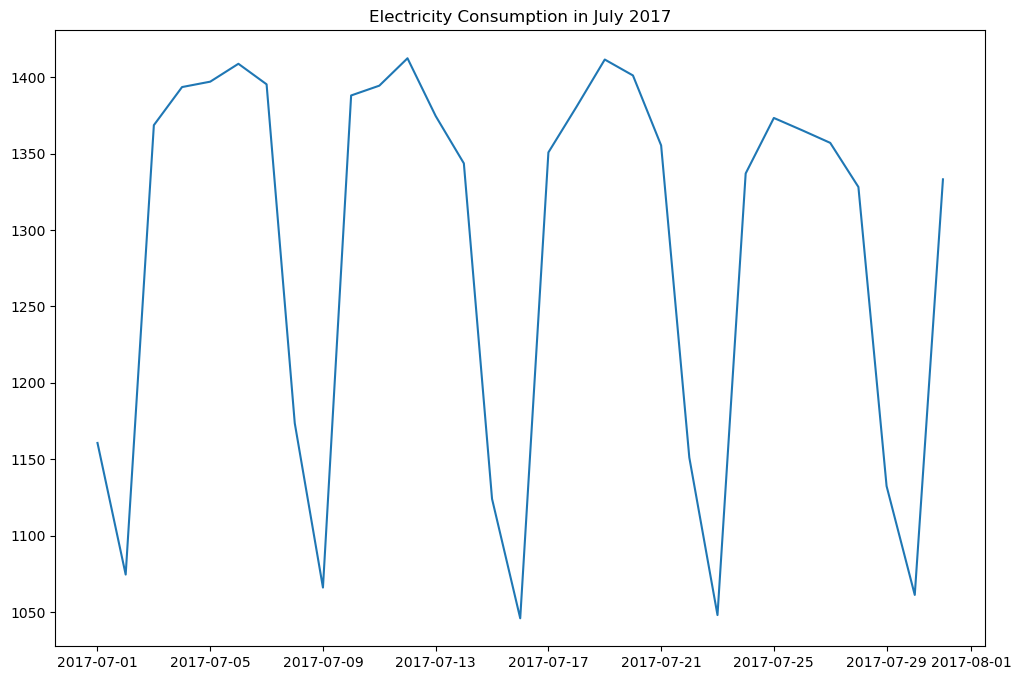

In [62]:
plt.figure(figsize=(12,8))
plt.plot(month['Date'], month['Consumption'])
plt.title('Electricity Consumption in July 2017')
plt.show()

When zooming on a month, we oberve another seasonality. There seems to be days of the week in which people consume less. For example, here's what happens when we highlight Sundays :

In [64]:
month['DayofWeek'] = month['Date'].dt.dayofweek

C:\Users\dudes\AppData\Local\Temp\ipykernel_6428\1303505254.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  month['DayofWeek'] = month['Date'].dt.dayofweek


In [65]:
month

,Date,Consumption,Wind,Solar,Wind+Solar,year,month,DayofWeek
4199,2017-07-01,1160.762,326.425,109.991,436.416,2017,7,5
4200,2017-07-02,1074.715,312.884,106.362,419.246,2017,7,6
4201,2017-07-03,1368.537,274.607,196.602,471.209,2017,7,0
4202,2017-07-04,1393.457,172.131,193.728,365.859,2017,7,1
4203,2017-07-05,1396.984,33.863,201.440,235.303,2017,7,2
4204,2017-07-06,1408.679,51.188,217.346,268.534,2017,7,3
4205,2017-07-07,1395.258,123.191,173.788,296.979,2017,7,4
4206,2017-07-08,1173.655,132.115,181.671,313.786,2017,7,5
4207,2017-07-09,1066.220,49.084,180.651,229.735,2017,7,6
4208,2017-07-10,1387.963,85.882,127.007,212.889,2017,7,0


In [66]:
day = month[month['DayofWeek']==6]

In [67]:
day.head()

,Date,Consumption,Wind,Solar,Wind+Solar,year,month,DayofWeek
4200,2017-07-02,1074.715,312.884,106.362,419.246,2017,7,6
4207,2017-07-09,1066.220,49.084,180.651,229.735,2017,7,6
4214,2017-07-16,1046.128,160.913,152.480,313.393,2017,7,6
4221,2017-07-23,1048.236,207.802,141.339,349.141,2017,7,6
4228,2017-07-30,1061.415,327.095,183.222,510.317,2017,7,6


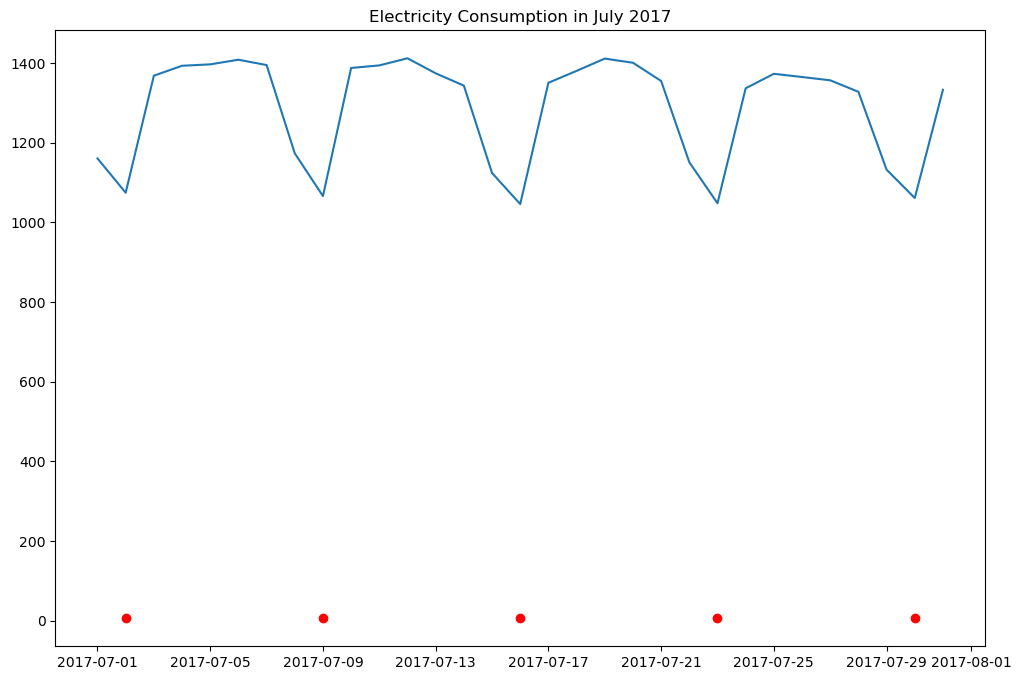

In [84]:
plt.figure(figsize=(12,8))
plt.plot(month['Date'], month['Consumption'], )
plt.scatter(day['Date'], day['DayofWeek'], color='red')
plt.title('Electricity Consumption in July 2017')
plt.show()

People are consuming less electricity on the Sunday

### 3. Further exploration

Q3 - To further explore the dataset, we might need to group the data. Create new columns for the consumption (by year and month), and create box-plots with seaborn. Comment on your results.

In [155]:
data.head()

,Date,Consumption,Wind,Solar,Wind+Solar,year,month
0,2006-01-01,1069.184,NaN,NaN,NaN,2006,Jan
1,2006-01-02,1380.521,NaN,NaN,NaN,2006,Jan
2,2006-01-03,1442.533,NaN,NaN,NaN,2006,Jan
3,2006-01-04,1457.217,NaN,NaN,NaN,2006,Jan
4,2006-01-05,1477.131,NaN,NaN,NaN,2006,Jan


In [86]:
data.dtypes

Date           datetime64[ns]
Consumption           float64
Wind                  float64
Solar                 float64
Wind+Solar            float64
dtype: object

In [146]:
data['year'] = data['Date'].dt.year
data['month'] = data['Date'].dt.strftime("%b")

In [147]:
data.head()

,Date,Consumption,Wind,Solar,Wind+Solar,year,month
0,2006-01-01,1069.184,NaN,NaN,NaN,2006,Jan
1,2006-01-02,1380.521,NaN,NaN,NaN,2006,Jan
2,2006-01-03,1442.533,NaN,NaN,NaN,2006,Jan
3,2006-01-04,1457.217,NaN,NaN,NaN,2006,Jan
4,2006-01-05,1477.131,NaN,NaN,NaN,2006,Jan


In [163]:
agg_data = data.groupby(['year','month'])['Consumption'].sum()

In [164]:
agg_data

year  month
2006  Apr      38251.76700
      Aug      38476.85200
      Dec      42956.27700
      Feb      41078.99300
      Jan      45304.70400
                  ...     
2017  Mar      44096.16300
      May      41015.51400
      Nov      44339.72455
      Oct      42355.21893
      Sep      40078.56092
Name: Consumption, Length: 144, dtype: float64

### 4. Fill missing values

Q4 - Do you face missing values in production ? If yes, which method can you apply ? What happens if you plot the modified data ? It is a good idea to keep the data this way ?

In [167]:
data.isna().sum()

Date              0
Consumption       0
Wind           1463
Solar          2195
Wind+Solar     2196
year              0
month             0
dtype: int64

There are 1463 misiing values in Wind production, 2195 missing values in Solar production and 2196 missing values in Wind+Solar

We can apply mean or median to find the missing values

In [169]:
data.head()

,Date,Consumption,Wind,Solar,Wind+Solar,year,month
0,2006-01-01,1069.184,NaN,NaN,NaN,2006,Jan
1,2006-01-02,1380.521,NaN,NaN,NaN,2006,Jan
2,2006-01-03,1442.533,NaN,NaN,NaN,2006,Jan
3,2006-01-04,1457.217,NaN,NaN,NaN,2006,Jan
4,2006-01-05,1477.131,NaN,NaN,NaN,2006,Jan


In [170]:
data['Wind'].mean()

164.81417260273975

In [171]:
data['Solar'].mean()

89.25869469835466

In [172]:
data['Wind+Solar'].mean()

272.6634814814815

In [177]:
data['Wind']=data['Wind'].fillna(164.81)

In [178]:
data['Solar']=data['Solar'].fillna(89.25)

In [179]:
data['Wind+Solar']=data['Wind+Solar'].fillna(272.66)

If we plot the data the graph we would something like this

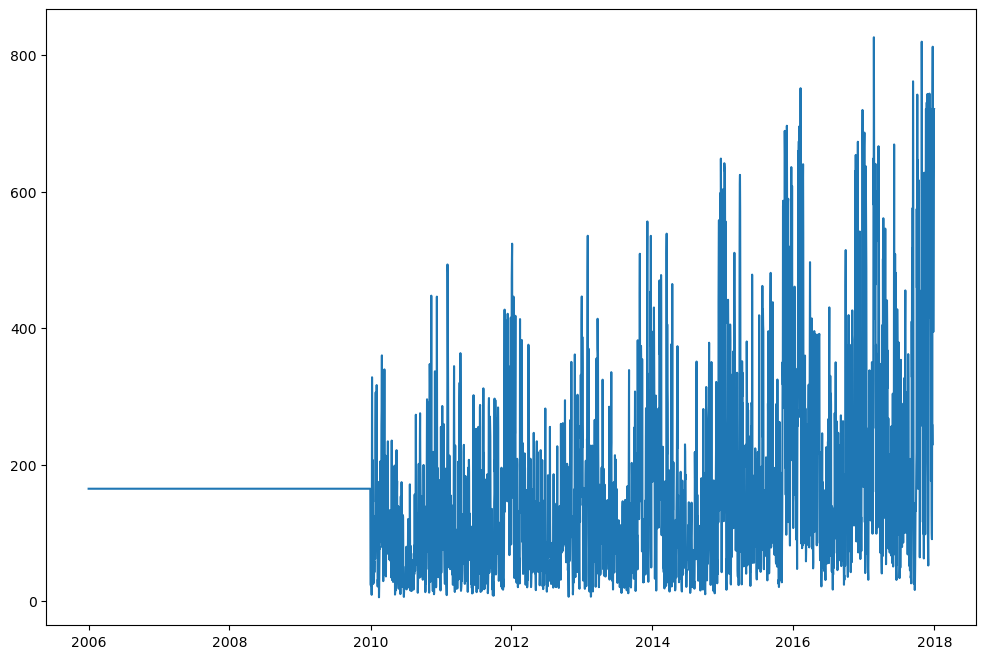

In [181]:
plt.figure(figsize=(12,8))
plt.plot(data['Date'], data['Wind'])

This example shows that filling the values is useful when there are missing values within the dataset not when we have not recorded years of data. We can fill the missing values but it doesnt serve any purpose and neither does provide any insights.

### 5. Series correlation

Q5 - A good way to explore time series, when you have several series, is to plot one series vs another. This is a good way to estimate the correlation between 2 series. Plot the relevant graphs (and compute the correlation) for wind + solar vs consumption, wind vs solar, wind vs consumption, and solar vs consumption.

In [192]:
# Correlation between consumption and overall production

correlation = data.corr(method='pearson')

C:\Users\dudes\AppData\Local\Temp\ipykernel_6428\1740279879.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = data.corr(method='pearson')


<Axes: >

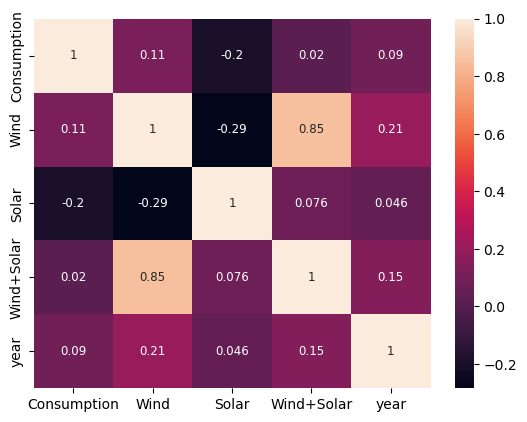

In [193]:
sns.heatmap(correlation, annot=True, annot_kws={'fontsize': 8.5})

<Axes: xlabel='Consumption', ylabel='Wind+Solar'>

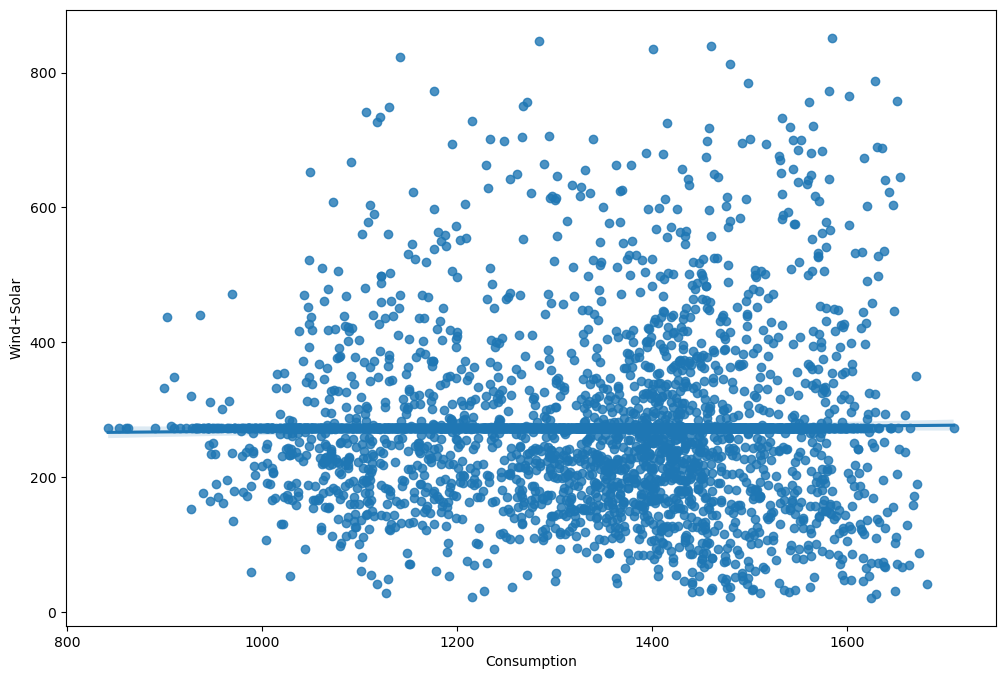

In [201]:
plt.figure(figsize=(12,8))
sns.regplot(x=data['Consumption'], y=data['Wind+Solar'], data=data)

<Axes: xlabel='Wind', ylabel='Solar'>

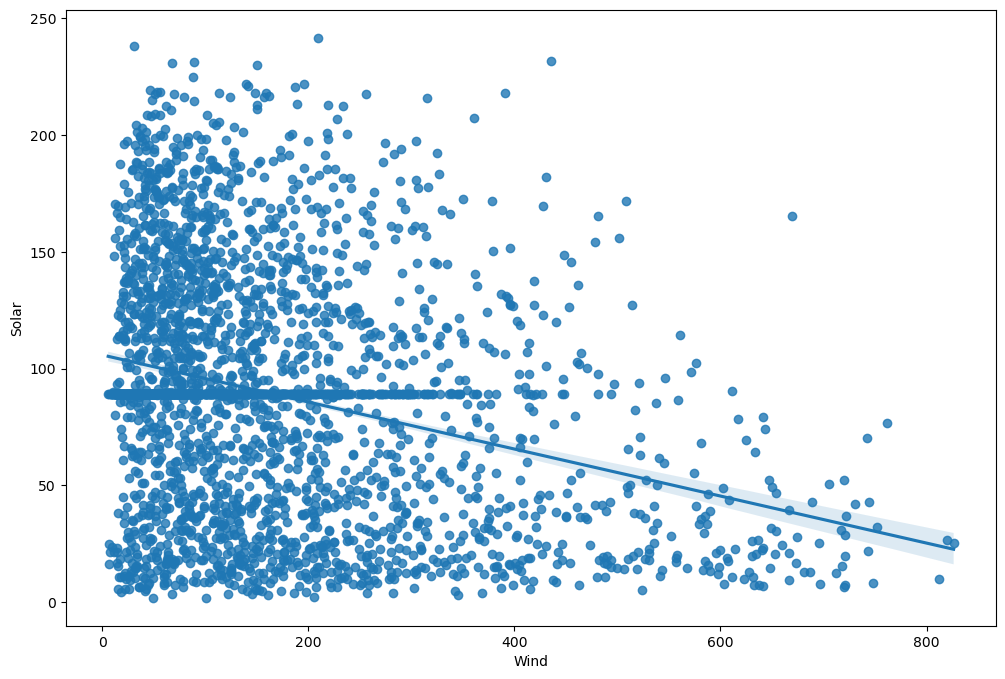

In [202]:
plt.figure(figsize=(12,8))
sns.regplot(x=data['Wind'], y=data['Solar'], data=data)

<Axes: xlabel='Consumption', ylabel='Wind'>

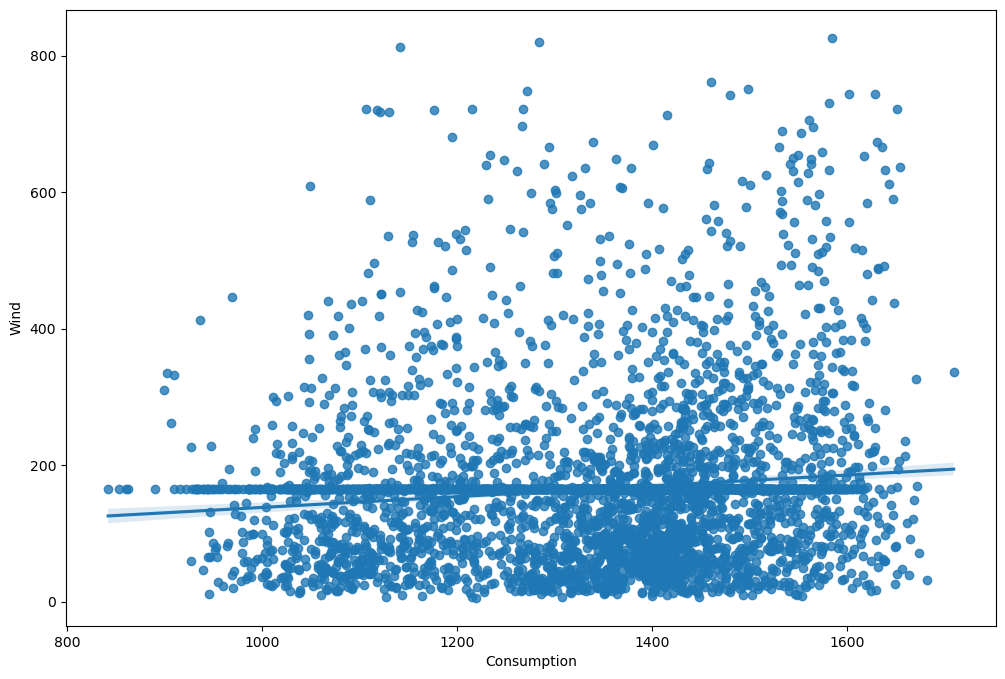

In [204]:
plt.figure(figsize=(12,8))
sns.regplot(x=data['Consumption'], y=data['Wind'], data=data)

<Axes: xlabel='Consumption', ylabel='Solar'>

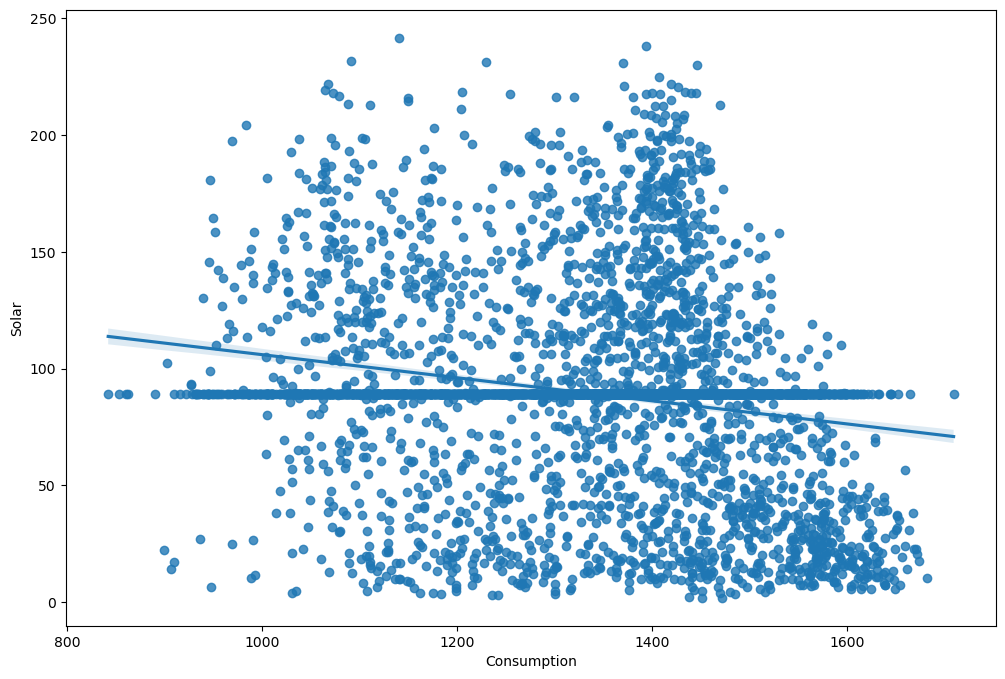

In [205]:
plt.figure(figsize=(12,8))
sns.regplot(x=data['Consumption'], y=data['Solar'], data=data)